# Hoodies Trends

Given the two datasets from orders in 2015 and 2016, create answers the question:

*Did the company sell more Hoodies in 2016 than in 2015 in the first 25 days of December?*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'/Users/daniela/Documents/Conundrum2'

In [3]:
orders_2015 = pd.read_csv('../Conundrum2/data/orders_2015.csv')
orders_2016 = pd.read_csv('../Conundrum2/data/orders_2016.csv')

In [4]:
orders = pd.concat([orders_2015, orders_2016])

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16950 entries, 0 to 9227
Data columns (total 10 columns):
order_date          16950 non-null object
order_date_year     16950 non-null int64
order_date_month    16950 non-null int64
order_date_day      16950 non-null int64
pages_visited       16950 non-null int64
order_id            16950 non-null object
customer_id         16950 non-null object
tshirt_category     16950 non-null object
tshirt_price        16950 non-null float64
tshirt_quantity     16950 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.4+ MB


Checking duplicates:

In [6]:
orders.drop_duplicates(inplace=True)

In [7]:
orders.head()

,order_date,order_date_year,order_date_month,order_date_day,pages_visited,order_id,customer_id,tshirt_category,tshirt_price,tshirt_quantity
0,2015-10-22T00:00:00.000Z,2015,10,22,12,HTS-88ua9r-0001,88ua9r,White T-Shirt M,20.0,1
1,2015-11-24T00:00:00.000Z,2015,11,24,15,HTS-je57lh-0001,je57lh,Hoodie,23.0,3
2,2015-10-10T00:00:00.000Z,2015,10,10,8,HTS-252675-0002,252675,White T-Shirt M,20.0,3
3,2015-11-29T00:00:00.000Z,2015,11,29,15,HTS-heb26i-0001,heb26i,Black T-Shirt F,17.5,1
4,2015-10-09T00:00:00.000Z,2015,10,9,10,HTS-989355-0003,989355,Hoodie,23.0,2


### 1. Order Trends in 2015-2016

Firstly, the number of orders in 2015-2016 are examined monthly:

In [8]:
orders.groupby(['order_date_year', 'order_date_month']).count().order_id

order_date_year  order_date_month
2015             1                   443
                 2                   352
                 3                   448
                 4                   419
                 5                   458
                 6                   563
                 7                   681
                 8                   800
                 9                   909
                 10                  921
                 11                  874
                 12                  854
2016             1                   673
                 2                   616
                 3                   659
                 4                   673
                 5                   677
                 6                   764
                 7                   779
                 8                   869
                 9                   863
                 10                  911
                 11                  838
                 12    

Displaying the result as Dataframe:

In [9]:
ordersByMonth = orders.groupby(['order_date_year', 'order_date_month']).count().order_id.reset_index()
ordersByMonth

,order_date_year,order_date_month,order_id
0,2015,1,443
1,2015,2,352
2,2015,3,448
3,2015,4,419
4,2015,5,458
5,2015,6,563
6,2015,7,681
7,2015,8,800
8,2015,9,909
9,2015,10,921


In [10]:
ordersByMonth.order_date_year == 2015

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
Name: order_date_year, dtype: bool

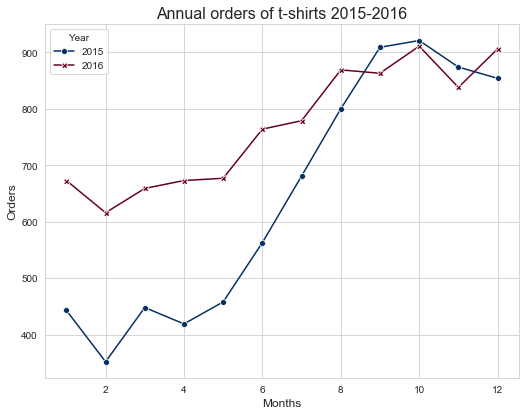

In [11]:
_ = sns.set_style("whitegrid")
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_month', 
                 y='order_id', 
                 hue='order_date_year', 
                 style='order_date_year',
                 data=ordersByMonth, 
                 markers=True, 
                 dashes=False,
                 palette='RdBu_r')
_ = plt.title('Annual orders of t-shirts 2015-2016', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Orders', size=12)
_ = plt.legend(title='Year', loc='upper left', labels=['2015', '2016'])

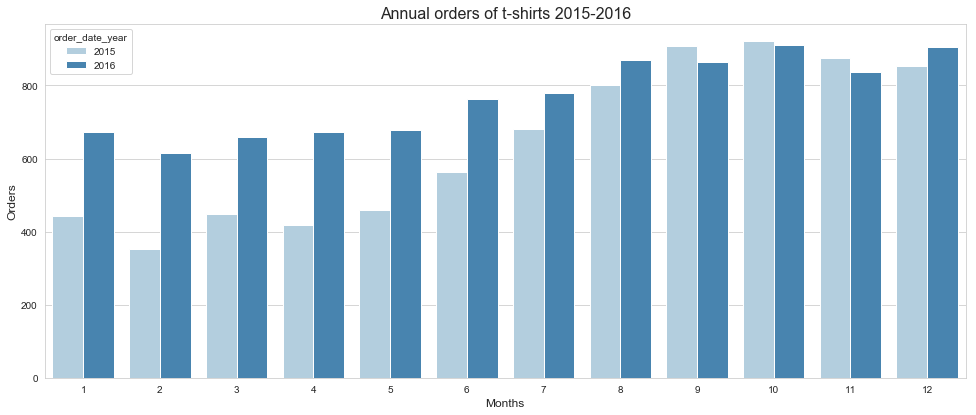

In [12]:
_ = plt.figure(figsize=(16.5, 6.5))
_ = sns.barplot(x='order_date_month', 
                y='order_id', 
                hue='order_date_year', 
                data=ordersByMonth,
                palette='Blues')
_ = plt.title('Annual orders of t-shirts 2015-2016', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Orders', size=12)

In [13]:
ordersByYear = orders.groupby(['order_date_year']).count().order_id.reset_index()
ordersByYear

,order_date_year,order_id
0,2015,7722
1,2016,9228


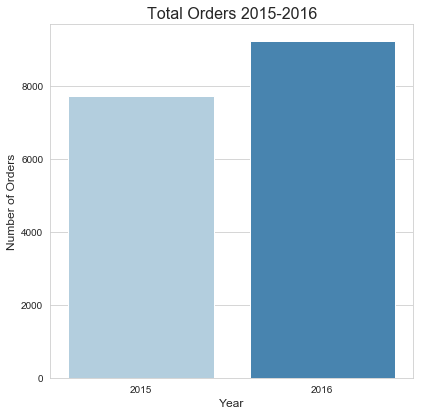

In [14]:
_ = plt.figure(figsize=(6.5, 6.5))
_ = sns.barplot(x='order_date_year', 
                y='order_id', 
                data=ordersByYear,
                palette='Blues')
_ = plt.title('Total Orders 2015-2016', size=16)
_ = plt.xlabel('Year', size=12)
_ = plt.ylabel('Number of Orders', size=12)

Displaying the results, we detect some interesting annual trends, as follows:
- As general trend, the number of order arises during the second half of the year.
- 2016 registed around 1500 more orders than 2015.
- In 2015, September and October were the most successful months with more than 900 orders monthly. The next year, the peak orders were achieved during October and December.
- December of 2016 had more orders than the same month in 2015. Let's investigate revenue details:

### 2. Item sales (sales reported monthly in 2015-2016)

In [15]:
orders.groupby(['order_date_year', 'order_date_month']).tshirt_quantity.sum()

order_date_year  order_date_month
2015             1                   1399
                 2                   1095
                 3                   1205
                 4                   1008
                 5                   1214
                 6                   1278
                 7                   1621
                 8                   2041
                 9                   2328
                 10                  2436
                 11                  2463
                 12                  2552
2016             1                   2116
                 2                   1758
                 3                   1918
                 4                   1774
                 5                   1746
                 6                   1891
                 7                   1946
                 8                   2184
                 9                   2218
                 10                  2564
                 11                  2408


In [16]:
soldItemsByMonth = orders.groupby(['order_date_year', 'order_date_month']).tshirt_quantity.sum().reset_index()
soldItemsByMonth

,order_date_year,order_date_month,tshirt_quantity
0,2015,1,1399
1,2015,2,1095
2,2015,3,1205
3,2015,4,1008
4,2015,5,1214
5,2015,6,1278
6,2015,7,1621
7,2015,8,2041
8,2015,9,2328
9,2015,10,2436


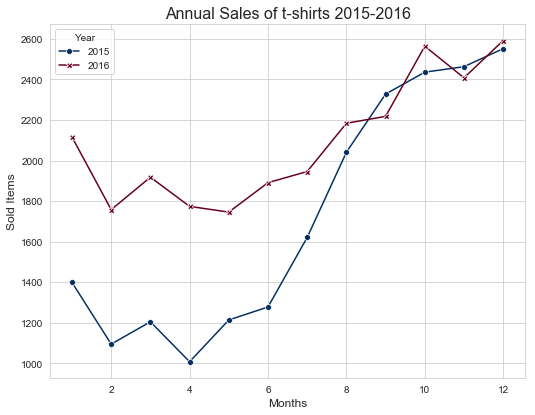

In [17]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_month', 
                 y='tshirt_quantity', 
                 hue='order_date_year', 
                 style='order_date_year',
                 data=soldItemsByMonth,
                 markers=True, 
                 dashes=False,
                 palette='RdBu_r')
_ = plt.title('Annual Sales of t-shirts 2015-2016', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)
_ = plt.legend(title='Year', loc='upper left', labels=['2015', '2016'])

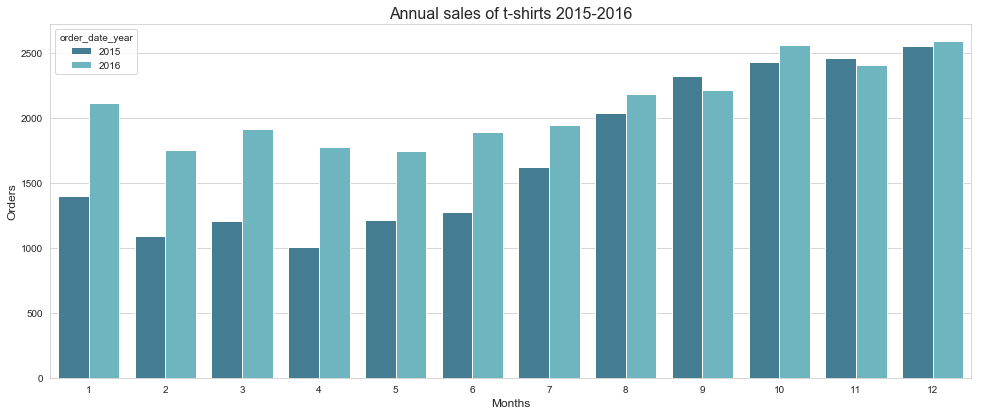

In [18]:
_ = plt.figure(figsize=(16.5, 6.5))
_ = sns.barplot(x='order_date_month', 
                y='tshirt_quantity', 
                hue='order_date_year', 
                data=soldItemsByMonth,
                saturation=0.85,
                palette='GnBu_d')
_ = plt.title('Annual sales of t-shirts 2015-2016', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Orders', size=12)

In [19]:
itemsByYear = orders.groupby(['order_date_year']).tshirt_quantity.sum().reset_index()
itemsByYear

,order_date_year,tshirt_quantity
0,2015,20640
1,2016,25115


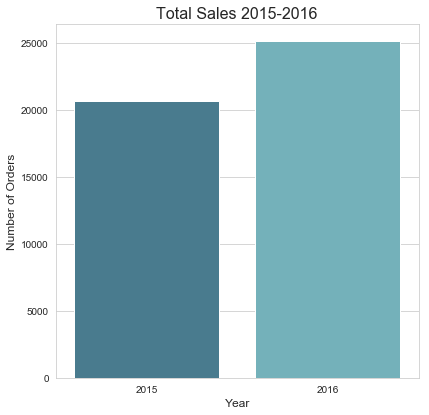

In [20]:
_ = plt.figure(figsize=(6.5, 6.5))
_ = sns.barplot(x='order_date_year', 
                y='tshirt_quantity', 
                data=itemsByYear,
                palette='GnBu_d')
_ = plt.title('Total Sales 2015-2016', size=16)
_ = plt.xlabel('Year', size=12)
_ = plt.ylabel('Number of Orders', size=12)

According to the total of items sold during 2015-2016:

- During 2016 were sold around 5000 more items than the previous year.
- October and December 2016 where the months with more sales that year. Between them, December was the most successful month with almost 9592 t-shirts sold. December 2015 had 9552 sales, being the most active month of the year.

Let's break down by type of t-shirt:

### 3. Type of T-shirts

In [21]:
orders.tshirt_category.unique()

array(['White T-Shirt M', 'Hoodie', 'Black T-Shirt F', 'Black T-Shirt M',
       'White T-Shirt F', 'Tennis Shirt'], dtype=object)

As we can see, white and black t-shirts are split by gender. To analyze type of t-shirts, white/black t-shirts are considere as one type regardless of the gender (M/F):

In [22]:
def join_genres(tshirt_category):
    if tshirt_category.startswith('Black T-Shirt'):
        tshirt_class = 'Black T-Shirt'
    elif tshirt_category.startswith('White T-Shirt'):
        tshirt_class = 'White T-Shirt'
    else:
        tshirt_class = tshirt_category
    return tshirt_class

A new column called `tshirt_class` is created to apply the function below. In this way, we have just 4 types of t-shirts, namely: white, black, hoodie and tennis.

In [23]:
orders['tshirt_class'] = orders.tshirt_category.apply(join_genres)

In [24]:
orders.groupby(['order_date_year', 'order_date_month', 'tshirt_class']).tshirt_quantity.sum()

order_date_year  order_date_month  tshirt_class 
2015             1                 Black T-Shirt    433
                                   Hoodie           364
                                   Tennis Shirt     130
                                   White T-Shirt    472
                 2                 Black T-Shirt    280
                                   Hoodie           214
                                   Tennis Shirt     139
                                   White T-Shirt    462
                 3                 Black T-Shirt    321
                                   Hoodie           406
                                   Tennis Shirt      74
                                   White T-Shirt    404
                 4                 Black T-Shirt    292
                                   Hoodie           244
                                   Tennis Shirt      71
                                   White T-Shirt    401
                 5                 Black T-Shirt    291

In [25]:
typeTshirtsByMonth = orders.groupby(['order_date_year', 'order_date_month', 'tshirt_class']).tshirt_quantity.sum().reset_index()
typeTshirtsByMonth.head(16)

,order_date_year,order_date_month,tshirt_class,tshirt_quantity
0,2015,1,Black T-Shirt,433
1,2015,1,Hoodie,364
2,2015,1,Tennis Shirt,130
3,2015,1,White T-Shirt,472
4,2015,2,Black T-Shirt,280
5,2015,2,Hoodie,214
6,2015,2,Tennis Shirt,139
7,2015,2,White T-Shirt,462
8,2015,3,Black T-Shirt,321
9,2015,3,Hoodie,406


In [26]:
typeTshirtsByMonth2015 = typeTshirtsByMonth[typeTshirtsByMonth.order_date_year == 2015]
typeTshirtsByMonth2016 = typeTshirtsByMonth[typeTshirtsByMonth.order_date_year == 2016]

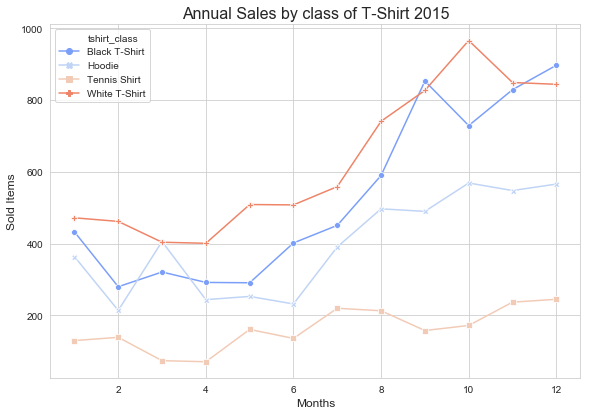

In [27]:
_ = plt.figure(figsize=(9.5, 6.5))
_ = sns.lineplot(x='order_date_month', 
                 y='tshirt_quantity', 
                 hue='tshirt_class', 
                 style='tshirt_class',
                 data=typeTshirtsByMonth2015,
                 markers=True, 
                 dashes=False,
                 palette='coolwarm')
_ = plt.title('Annual Sales by class of T-Shirt 2015', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

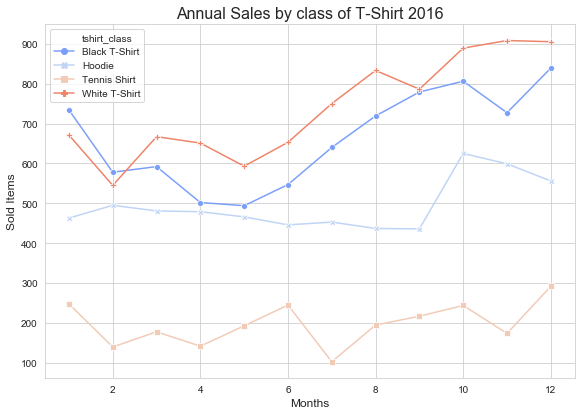

In [28]:
_ = plt.figure(figsize=(9.5, 6.5))
_ = sns.lineplot(x='order_date_month', 
                 y='tshirt_quantity', 
                 hue='tshirt_class', 
                 style='tshirt_class',
                 data=typeTshirtsByMonth2016,
                 markers=True, 
                 dashes=False,
                 palette='coolwarm')
_ = plt.title('Annual Sales by class of T-Shirt 2016', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

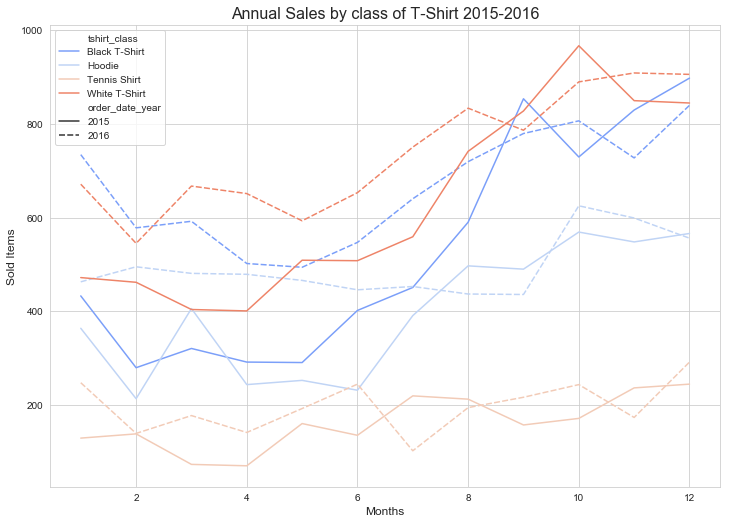

In [29]:
_ = plt.figure(figsize=(12, 8.5))
_ = sns.lineplot(x='order_date_month', 
                 y='tshirt_quantity', 
                 hue='tshirt_class', 
                 style='order_date_year', 
                 data=typeTshirtsByMonth, 
                 dashes=True, 
                 palette='coolwarm')
_ = plt.title('Annual Sales by class of T-Shirt 2015-2016', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Sold Items', size=12)

In [30]:
typeTshirtsByYear = orders.groupby(['order_date_year', 'tshirt_class']).tshirt_quantity.sum().reset_index()
typeTshirtsByYear.head()

,order_date_year,tshirt_class,tshirt_quantity
0,2015,Black T-Shirt,6368
1,2015,Hoodie,4774
2,2015,Tennis Shirt,1956
3,2015,White T-Shirt,7542
4,2016,Black T-Shirt,7957


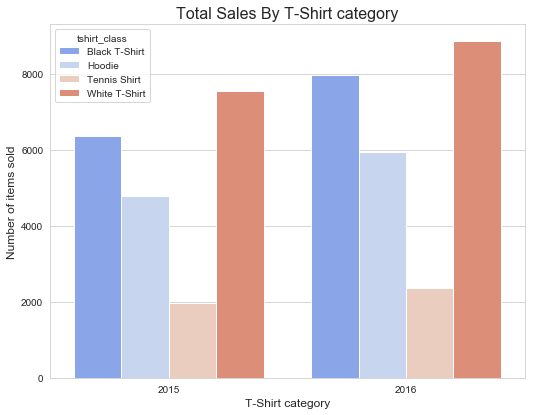

In [31]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.barplot(x='order_date_year',
                y='tshirt_quantity', 
                hue='tshirt_class', 
                data=typeTshirtsByYear,
                palette='coolwarm')
_ = plt.title('Total Sales By T-Shirt category', size=16)
_ = plt.xlabel('T-Shirt category', size=12)
_ = plt.ylabel('Number of items sold', size=12)

In [32]:
df_merge = pd.merge(typeTshirtsByYear, typeTshirtsByYear, on=['tshirt_class'])
df_merge = df_merge[(df_merge.order_date_year_x != df_merge.order_date_year_y) & (df_merge.order_date_year_x == 2015)]

In [33]:
df_merge['growth_sales'] = ((df_merge.tshirt_quantity_y - df_merge.tshirt_quantity_x)/df_merge.tshirt_quantity_x)*100
df_merge

,order_date_year_x,tshirt_class,tshirt_quantity_x,order_date_year_y,tshirt_quantity_y,growth_sales
1,2015,Black T-Shirt,6368,2016,7957,24.952889
5,2015,Hoodie,4774,2016,5936,24.340176
9,2015,Tennis Shirt,1956,2016,2371,21.216769
13,2015,White T-Shirt,7542,2016,8851,17.356139


The analysis by t-shirts class reveals:
- White T-Shirts are the most popular items, followed by black t-shirts, hoddies and tennies shirts during 2015 and 2016.
- During 2016 were sold more items of every category than the previous year: 17.35% more white t-shirts, 21.21% more tennis, 24.34 more hoodies and almost 25 more black t-shirts.
- Between January and August, white t-shirts sold in 2016 exceed the sales of the same t-shirt class during 2015. During September and October, the sales of white t-shirts decreased in 2016 with respect to the previous year but then they arose again during November and December. In 2015, there was only one peak of white t shirts sales in October, meanwhile in 2016, from October to December, the sales kept strong. 
- Between January and August, black t-shirts sold in 2016 exceed the sales of the same t-shirt class during 2015. During September and December were sold more Black T-shirts than the next year.
- Hoodies sales were more successfull during 2016 in almost all year (except by August and September).
- Tennies t-shirts sales during 2016 exceed the sales in 2015 during 9 months of the year (except by July, August and November).

### 4. Revenues

In [34]:
orders['revenue'] = orders.tshirt_price*orders.tshirt_quantity

#### 4.1 Annual Revenues

In [35]:
orders.head()

,order_date,order_date_year,order_date_month,order_date_day,pages_visited,order_id,customer_id,tshirt_category,tshirt_price,tshirt_quantity,tshirt_class,revenue
0,2015-10-22T00:00:00.000Z,2015,10,22,12,HTS-88ua9r-0001,88ua9r,White T-Shirt M,20.0,1,White T-Shirt,20.0
1,2015-11-24T00:00:00.000Z,2015,11,24,15,HTS-je57lh-0001,je57lh,Hoodie,23.0,3,Hoodie,69.0
2,2015-10-10T00:00:00.000Z,2015,10,10,8,HTS-252675-0002,252675,White T-Shirt M,20.0,3,White T-Shirt,60.0
3,2015-11-29T00:00:00.000Z,2015,11,29,15,HTS-heb26i-0001,heb26i,Black T-Shirt F,17.5,1,Black T-Shirt,17.5
4,2015-10-09T00:00:00.000Z,2015,10,9,10,HTS-989355-0003,989355,Hoodie,23.0,2,Hoodie,46.0


In [36]:
revenuesByYear = orders.groupby(['order_date_year']).revenue.sum().reset_index()
revenuesByYear

,order_date_year,revenue
0,2015,418818.5
1,2016,508920.5


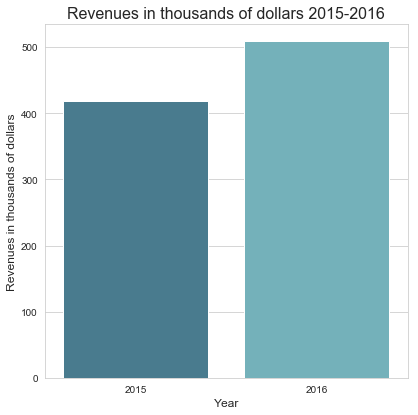

In [37]:
_ = plt.figure(figsize=(6.5, 6.5))
_ = sns.barplot(x=revenuesByYear.order_date_year, 
                y=revenuesByYear.revenue/1000, 
                palette='GnBu_d')
_ = plt.title('Revenues in thousands of dollars 2015-2016', size=16)
_ = plt.xlabel('Year', size=12)
_ = plt.ylabel('Revenues in thousands of dollars', size=12)

In [38]:
revenuesByMonth = orders.groupby(['order_date_year', 'order_date_month']).revenue.sum().reset_index()
revenuesByMonth

,order_date_year,order_date_month,revenue
0,2015,1,28489.5
1,2015,2,22188.0
2,2015,3,24846.0
3,2015,4,20395.5
4,2015,5,24775.5
5,2015,6,25741.5
6,2015,7,33341.5
7,2015,8,41537.5
8,2015,9,46614.0
9,2015,10,49413.0


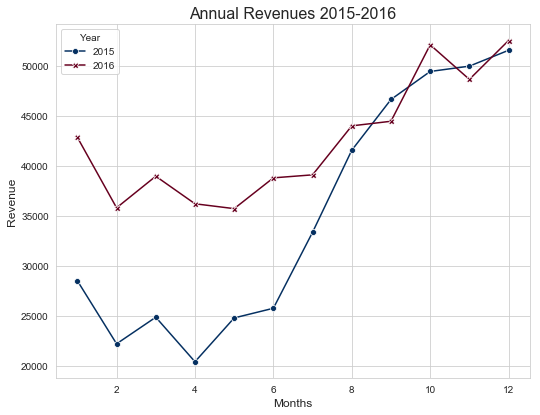

In [39]:
_ = plt.figure(figsize=(8.5, 6.5))
_ = sns.lineplot(x='order_date_month', 
                 y='revenue', 
                 hue='order_date_year', 
                 style='order_date_year',
                 data=revenuesByMonth,
                 markers=True, 
                 dashes=False,
                 palette='RdBu_r')
_ = plt.title('Annual Revenues 2015-2016', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Revenue', size=12)
_ = plt.legend(title='Year', loc='upper left', labels=['2015', '2016'])

In [40]:
revenuesByClassMonth = orders.groupby(['order_date_year', 'order_date_month', 'tshirt_class']).revenue.sum().reset_index()
revenuesByClassMonth.head()

,order_date_year,order_date_month,tshirt_class,revenue
0,2015,1,Black T-Shirt,7931.5
1,2015,1,Hoodie,8372.0
2,2015,1,Tennis Shirt,3120.0
3,2015,1,White T-Shirt,9066.0
4,2015,2,Black T-Shirt,5080.0


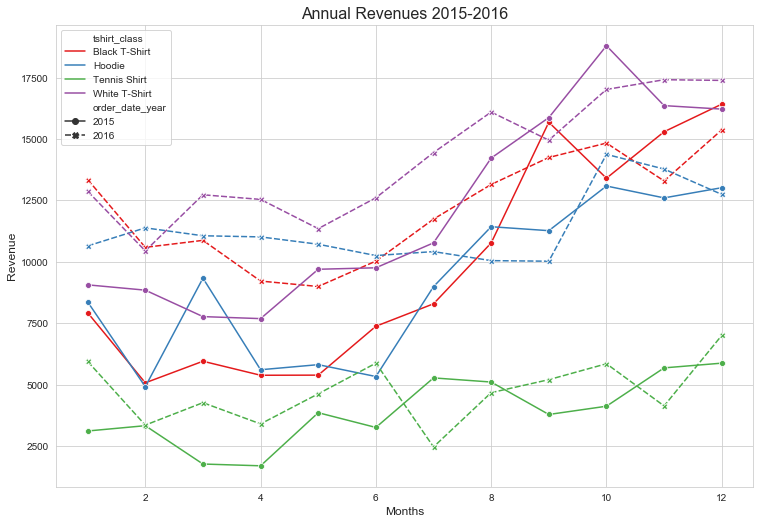

In [41]:
_ = plt.figure(figsize=(12.5, 8.5))
_ = sns.lineplot(x='order_date_month', 
                 y='revenue', 
                 hue='tshirt_class',
                 style='order_date_year', 
                 data=revenuesByClassMonth,
                 dashes=True,
                 markers=True,
                 palette='Set1')
_ = plt.title('Annual Revenues 2015-2016', size=16)
_ = plt.xlabel('Months', size=12)
_ = plt.ylabel('Revenue', size=12)

In [42]:
revenuetypeTshirtsByYear = orders.groupby(['order_date_year', 'tshirt_class']).revenue.sum().reset_index()
revenuetypeTshirtsByYear

,order_date_year,tshirt_class,revenue
0,2015,Black T-Shirt,116994.5
1,2015,Hoodie,109802.0
2,2015,Tennis Shirt,46944.0
3,2015,White T-Shirt,145078.0
4,2016,Black T-Shirt,145704.5
5,2016,Hoodie,136486.0
6,2016,Tennis Shirt,56868.0
7,2016,White T-Shirt,169862.0


In [43]:
df_merge = pd.merge(revenuetypeTshirtsByYear, revenuetypeTshirtsByYear, on=['tshirt_class'])
df_merge = df_merge[(df_merge.order_date_year_x != df_merge.order_date_year_y) & (df_merge.order_date_year_x == 2015)]

In [44]:
df_merge['growth_revenue'] = ((df_merge.revenue_y - df_merge.revenue_x)/df_merge.revenue_x)*100
df_merge

,order_date_year_x,tshirt_class,revenue_x,order_date_year_y,revenue_y,growth_revenue
1,2015,Black T-Shirt,116994.5,2016,145704.5,24.539615
5,2015,Hoodie,109802.0,2016,136486.0,24.301925
9,2015,Tennis Shirt,46944.0,2016,56868.0,21.140082
13,2015,White T-Shirt,145078.0,2016,169862.0,17.083224


### 5. Hoodies sales

And finally, we answer the question: did the company sell more Hoodies in 2016 than in 2015 in the first 25 days of December?

In [45]:
hoodie = orders[(orders.tshirt_category == 'Hoodie') & (orders.order_date_month == 12)]

In [46]:
hoodieDecemberSales = hoodie.groupby(['order_date_year', 'order_date_day']).tshirt_quantity.sum().reset_index()

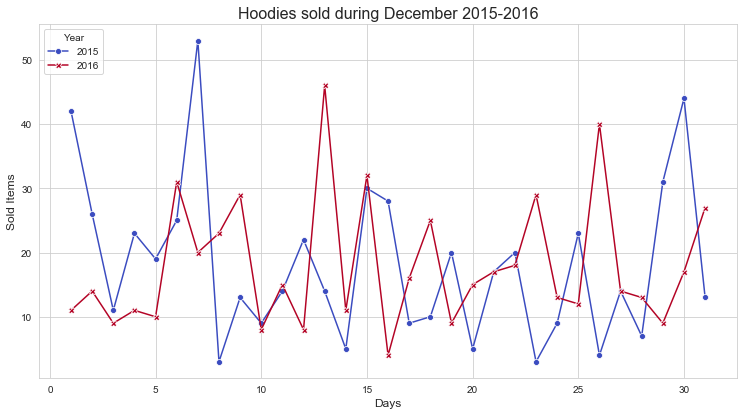

In [47]:
_ = plt.figure(figsize=(12.5, 6.5))
_ = sns.lineplot(x='order_date_day', 
                 y='tshirt_quantity', 
                 hue='order_date_year', 
                 style='order_date_year',
                 data=hoodieDecemberSales,
                 markers=True,
                 dashes=False, 
                 palette='coolwarm')
_ = plt.title('Hoodies sold during December 2015-2016', size=16)
_ = plt.xlabel('Days', size=12)
_ = plt.ylabel('Sold Items', size=12)
_ = plt.legend(title='Year', loc='upper left', labels=['2015', '2016'])

In [48]:
def hoddiesDiffDecember(dataFrame, merge_on='order_date_day', output='revenue'):
    df_merge = pd.merge(dataFrame, dataFrame, on=[merge_on])
    df_merge = df_merge[(df_merge.order_date_year_x != df_merge.order_date_year_y) & (df_merge.order_date_year_x == 2015)]
    df_merge['diff_'+ output] = df_merge[output+'_y'] - df_merge[output+'_x']
    df_diff = df_merge.loc[:, [merge_on, 'diff_'+ output]]
    return df_diff

In [49]:
hoodieDecemberRevenue = hoodie.groupby(['order_date_year', 'order_date_day']).revenue.sum().reset_index()

In [50]:
df_diff_revenue = hoddiesDiffDecember(hoodieDecemberRevenue, merge_on='order_date_day', output='revenue')

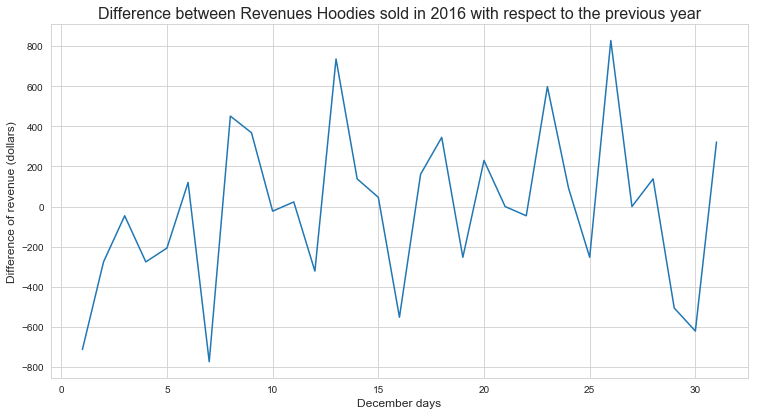

In [51]:
_ = plt.figure(figsize=(12.5, 6.5))
_ = sns.lineplot(x='order_date_day', 
                 y='diff_revenue',
                 data=df_diff_revenue)
_ = plt.title('Difference between Revenues Hoodies sold in 2016 with respect to the previous year', size=16)
_ = plt.xlabel('December days', size=12)
_ = plt.ylabel('Difference of revenue (dollars)', size=12)

In [52]:
np.sum(df_diff_revenue.diff_revenue[df_diff_revenue.order_date_day < 25])

-180.0

Total sales in December 2015 and 2016:

In [53]:
hoodie.groupby(['order_date_year']).tshirt_quantity.sum()

order_date_year
2015    566
2016    556
Name: tshirt_quantity, dtype: int64

And more specifically, the **difference in sales the first 25 days of December**:

In [54]:
df_diff = hoddiesDiffDecember(hoodieDecemberSales, merge_on='order_date_day', output='tshirt_quantity')

np.sum(df_diff.diff_tshirt_quantity[df_diff.order_date_day < 25])

-6

In other words, 
- **in 2015 where sold 6 items more than in 2016 the first 25 days of December.**
- **Comparing this window of 25 days, revenues by Hoodies decreased in 180 dollars in 2016 with respect to the previous year.**